In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancerdata = pd.read_csv("E:\\DSP 17\\pratice paper\\Breast Cancer Prediction\\cancerdata.csv")
cancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
cancerdata.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
summary = cancerdata.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
count = cancerdata.diagnosis.value_counts()
count

B    357
M    212
Name: diagnosis, dtype: int64

(Text(0.5, 1.0, 'diagnosis of M and B'),
 Text(0.5, 0, 'diagnosis'),
 Text(0, 0.5, 'count'))

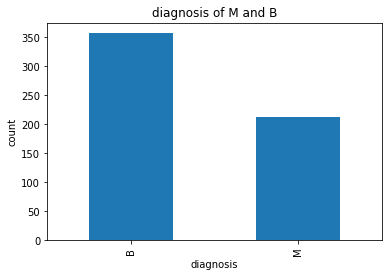

In [7]:
count.plot.bar()
plt.title('diagnosis of M and B'),plt.xlabel('diagnosis'),plt.ylabel('count')

In [8]:
cancerdata.drop(cancerdata.columns[[-1, 0]], axis=1, inplace=True)
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [9]:
cancerdata_corr = cancerdata.corr()
cancerdata_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


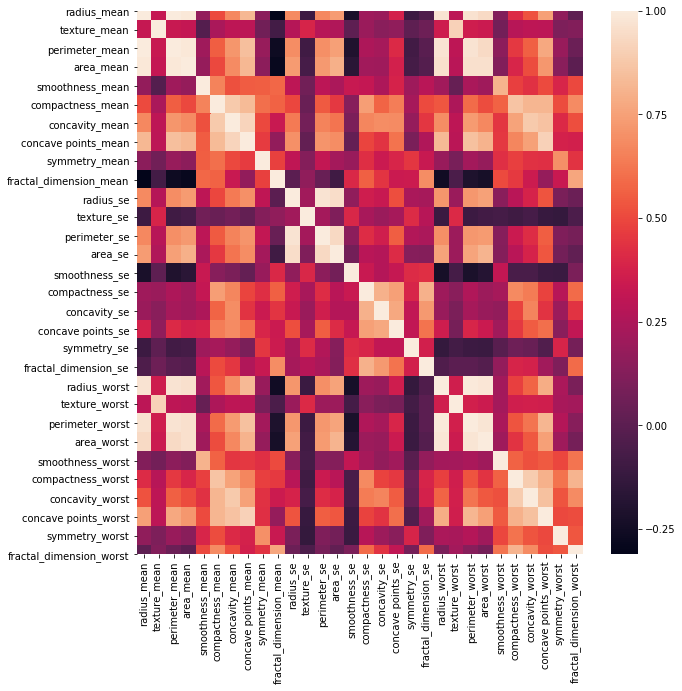

In [10]:
f,ax = plt. subplots(figsize = (10,10))
#sns.heatmap(cancerdata_corr,  annot = True, cmap =plt.cm.Reds)
sns.heatmap(cancerdata_corr)

In [11]:
featureMeans = list(cancerdata.columns[1:10])

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


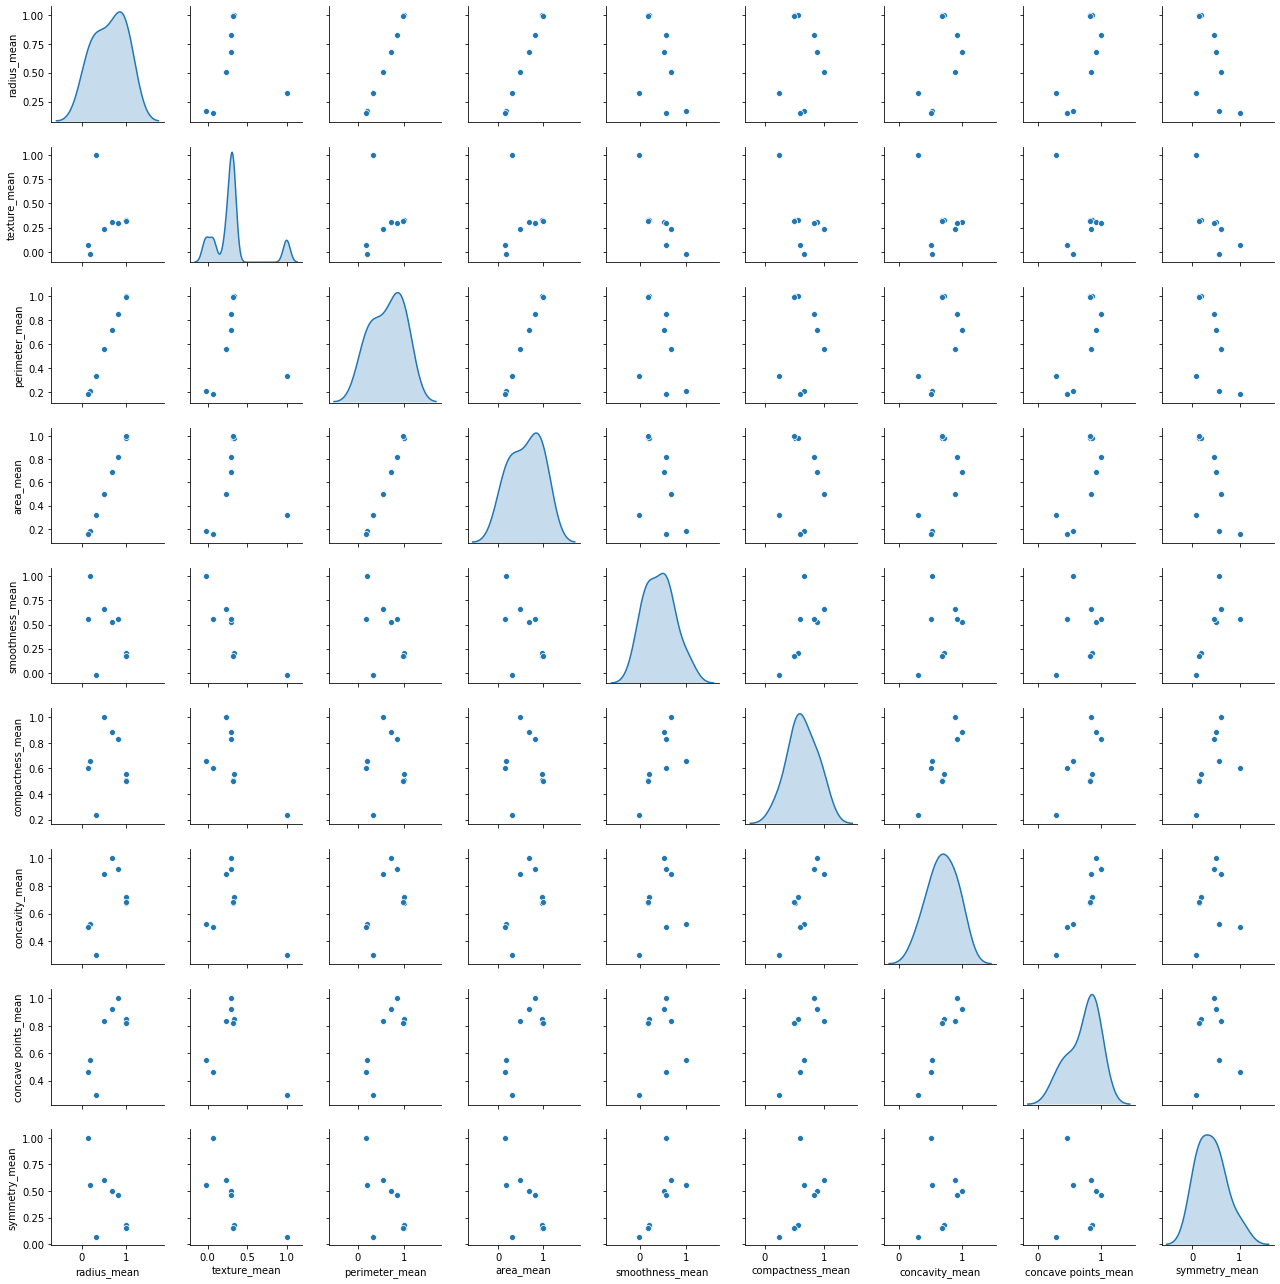

In [12]:
correlationData = cancerdata[featureMeans].corr()
sns.pairplot(cancerdata[featureMeans].corr(), diag_kind='kde', size=2);

In [13]:
x = cancerdata.drop("diagnosis", axis = 1)
y = cancerdata.diagnosis

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print(vif.round(1))

    VIF Factor                 features
0      63306.2              radius_mean
1        251.0             texture_mean
2      58123.6           perimeter_mean
3       1287.3                area_mean
4        393.4          smoothness_mean
5        201.0         compactness_mean
6        157.9           concavity_mean
7        154.2      concave points_mean
8        184.4            symmetry_mean
9        629.7   fractal_dimension_mean
10       236.7                radius_se
11        24.7               texture_se
12       211.4             perimeter_se
13        72.5                  area_se
14        26.2            smoothness_se
15        44.9           compactness_se
16        33.2             concavity_se
17        53.7        concave points_se
18        37.2              symmetry_se
19        27.5     fractal_dimension_se
20      9674.7             radius_worst
21       343.0            texture_worst
22      4487.8          perimeter_worst
23      1138.8               area_worst


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# LogisticRegression Model

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_pred = log_reg.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
print("confusion_matrix :")
print(confusion_matrix(y_test, log_pred))
print("classification_report :")
print(classification_report(y_test, log_pred))
print("acc_score :")
print(accuracy_score(y_test, log_pred))

confusion_matrix :
[[101   5]
 [  6  59]]
classification_report :
              precision    recall  f1-score   support

           B       0.94      0.95      0.95       106
           M       0.92      0.91      0.91        65

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

acc_score :
0.935672514619883


# DecisionTree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
dtree_pred = dtree.predict(x_test)

In [26]:
print("confusion_matrix :")
print(confusion_matrix(y_test, dtree_pred))
print("classification_report :")
print(classification_report(y_test, dtree_pred))
print("acc_score :")
print(accuracy_score(y_test, dtree_pred))

confusion_matrix :
[[101   5]
 [ 10  55]]
classification_report :
              precision    recall  f1-score   support

           B       0.91      0.95      0.93       106
           M       0.92      0.85      0.88        65

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171

acc_score :
0.9122807017543859


# RandomForestClassifier Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf_pred = rf.predict(x_test)

In [29]:
print("confusion_matrix :")
print(confusion_matrix(y_test, rf_pred))
print("classification_report :")
print(classification_report(y_test, rf_pred))
print("acc_score :")
print(accuracy_score(y_test, rf_pred))

confusion_matrix :
[[104   2]
 [  8  57]]
classification_report :
              precision    recall  f1-score   support

           B       0.93      0.98      0.95       106
           M       0.97      0.88      0.92        65

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

acc_score :
0.9415204678362573


# kNNClassifier Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn_pred = kNN.predict(x_test)

In [32]:
print("confusion_matrix :")
print(confusion_matrix(y_test, knn_pred))
print("classification_report :")
print(classification_report(y_test, knn_pred))
print("acc_score :")
print(accuracy_score(y_test, knn_pred))

confusion_matrix :
[[101   5]
 [  8  57]]
classification_report :
              precision    recall  f1-score   support

           B       0.93      0.95      0.94       106
           M       0.92      0.88      0.90        65

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

acc_score :
0.9239766081871345


# SVMClassifier Model

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
svm_pred = svc.predict(x_test) 

In [35]:
print("confusion_matrix :")
print(confusion_matrix(y_test, svm_pred))
print("classification_report :")
print(classification_report(y_test, svm_pred))
print("acc_score :")
print(accuracy_score(y_test, svm_pred))

confusion_matrix :
[[106   0]
 [ 65   0]]
classification_report :
              precision    recall  f1-score   support

           B       0.62      1.00      0.77       106
           M       0.00      0.00      0.00        65

    accuracy                           0.62       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.62      0.47       171

acc_score :
0.6198830409356725


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
svc2 = SVC(kernel='linear')
svc2.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
svm2_pred = svc.predict(x_test)

In [38]:
print("confusion_matrix :")
print(confusion_matrix(y_test, svm2_pred))
print("classification_report :")
print(classification_report(y_test, svm2_pred))
print("acc_score :")
print(accuracy_score(y_test, svm2_pred))

confusion_matrix :
[[106   0]
 [ 65   0]]
classification_report :
              precision    recall  f1-score   support

           B       0.62      1.00      0.77       106
           M       0.00      0.00      0.00        65

    accuracy                           0.62       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.62      0.47       171

acc_score :
0.6198830409356725


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# NaiveBayes Model

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
nb_pred = nb.predict(x_test)

In [41]:
print("confusion_matrix :")
print(confusion_matrix(y_test, nb_pred))
print("classification_report :")
print(classification_report(y_test, nb_pred))
print("acc_score :")
print(accuracy_score(y_test, nb_pred))

confusion_matrix :
[[101   5]
 [  8  57]]
classification_report :
              precision    recall  f1-score   support

           B       0.93      0.95      0.94       106
           M       0.92      0.88      0.90        65

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

acc_score :
0.9239766081871345


# Models Comparing

In [42]:
print("log_regresion_acc_score :")
print(accuracy_score(y_test, log_pred))
print("Decision_tree_acc_score :")
print(accuracy_score(y_test, dtree_pred))
print("random_forest_acc_score :")
print(accuracy_score(y_test, rf_pred))
print("KNN_acc_score :")
print(accuracy_score(y_test, knn_pred))
print("SVM_acc_score :")
print(accuracy_score(y_test, svm_pred))
print("SVM2_acc_score :")
print(accuracy_score(y_test, svm2_pred))
print("NB_acc_score :")
print(accuracy_score(y_test, nb_pred))

log_regresion_acc_score :
0.935672514619883
Decision_tree_acc_score :
0.9122807017543859
random_forest_acc_score :
0.9415204678362573
KNN_acc_score :
0.9239766081871345
SVM_acc_score :
0.6198830409356725
SVM2_acc_score :
0.6198830409356725
NB_acc_score :
0.9239766081871345
